In [1]:
# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')
    
    fo.close()
    return dict




def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)
    
        

    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)
    

def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):
    
    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]
    
    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)
    
    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')
    
    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])

    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [2]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


In [3]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Dataset not found. Downloading...
Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


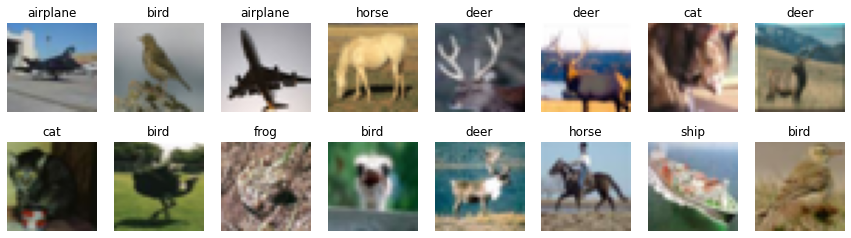

In [4]:
# show some random images from train, and their labels

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In [5]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

# Creation and Training of the Model

## Base Model

Epoch 1/60
313/313 [==============================] - 5s 15ms/step - loss: 2.2440 - accuracy: 0.1618 - val_loss: 1.7365 - val_accuracy: 0.3668
Epoch 2/60
313/313 [==============================] - 4s 14ms/step - loss: 1.7457 - accuracy: 0.3567 - val_loss: 1.5099 - val_accuracy: 0.4504
Epoch 3/60
313/313 [==============================] - 4s 14ms/step - loss: 1.5674 - accuracy: 0.4221 - val_loss: 1.3607 - val_accuracy: 0.5027
Epoch 4/60
313/313 [==============================] - 4s 14ms/step - loss: 1.4322 - accuracy: 0.4786 - val_loss: 1.2679 - val_accuracy: 0.5418
Epoch 5/60
313/313 [==============================] - 4s 14ms/step - loss: 1.3374 - accuracy: 0.5170 - val_loss: 1.1465 - val_accuracy: 0.5884
Epoch 6/60
313/313 [==============================] - 4s 14ms/step - loss: 1.2623 - accuracy: 0.5473 - val_loss: 1.1227 - val_accuracy: 0.5987
Epoch 7/60
313/313 [==============================] - 4s 14ms/step - loss: 1.1761 - accuracy: 0.5771 - val_loss: 1.0099 - val_accuracy: 0.6406

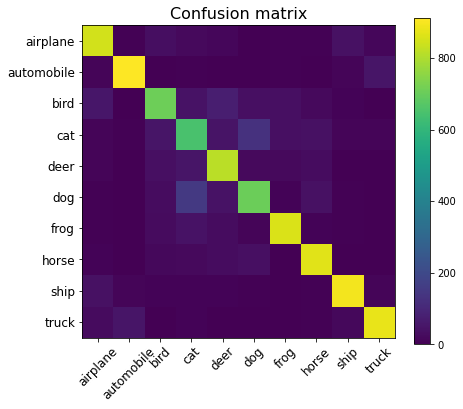

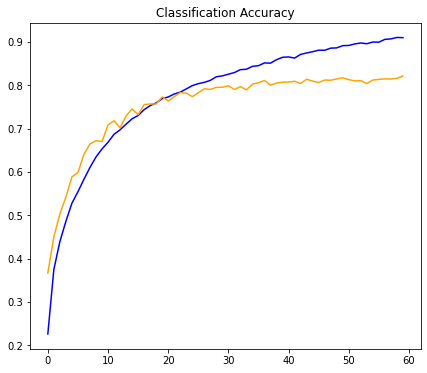



Accuracy on test dataset: 0.8158


In [22]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 128
EPOCHS = 60

def model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #Testing of different optimizers
    opt = keras.optimizers.SGD(lr=INIT_LR, momentum=0.91)
    #opt = keras.optimizers.Adamax(lr=INIT_LR)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

K.clear_session()
model = model()
# model.summary()

# fit model
hist = model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights_normal.h5")

# load weights from file (can call without model.fit)
model.load_weights("weights_normal.h5")

# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 6))
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')
plt.show()

print("\n\nAccuracy on test dataset:", accuracy_score(y_test_index, y_pred_test_classes))

## Data Augmentation

Epoch 1/60
313/313 [==============================] - 19s 60ms/step - loss: 2.3536 - accuracy: 0.1321 - val_loss: 1.7668 - val_accuracy: 0.3416
Epoch 2/60
313/313 [==============================] - 19s 59ms/step - loss: 1.8049 - accuracy: 0.3205 - val_loss: 1.5301 - val_accuracy: 0.4412
Epoch 3/60
313/313 [==============================] - 19s 59ms/step - loss: 1.6064 - accuracy: 0.4079 - val_loss: 1.3654 - val_accuracy: 0.4976
Epoch 4/60
313/313 [==============================] - 19s 60ms/step - loss: 1.4881 - accuracy: 0.4581 - val_loss: 1.2898 - val_accuracy: 0.5298
Epoch 5/60
313/313 [==============================] - 19s 60ms/step - loss: 1.3959 - accuracy: 0.4936 - val_loss: 1.1874 - val_accuracy: 0.5837
Epoch 6/60
313/313 [==============================] - 19s 60ms/step - loss: 1.3120 - accuracy: 0.5244 - val_loss: 1.1688 - val_accuracy: 0.5854
Epoch 7/60
313/313 [==============================] - 19s 60ms/step - loss: 1.2579 - accuracy: 0.5484 - val_loss: 1.1988 - val_accuracy:

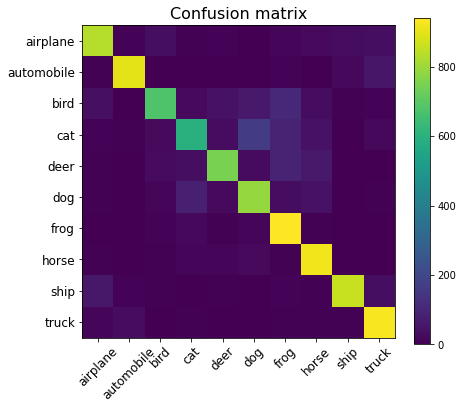

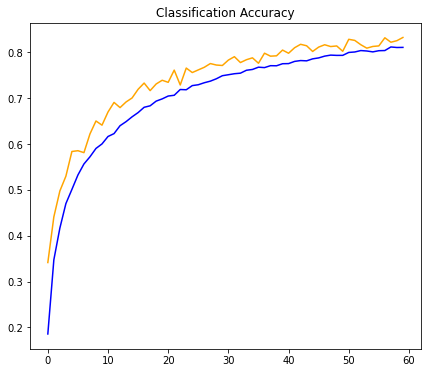



Accuracy on test dataset: 0.821


In [31]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 128
EPOCHS = 60

def model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    #Testing of different optimizers
    opt = keras.optimizers.SGD(lr=INIT_LR, momentum=0.91)
    #opt = keras.optimizers.Adamax(lr=INIT_LR)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

K.clear_session()
model = model()
# model.summary()

#Creation of the modified data set (data augmentation)
imgProc = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
modData = imgProc.flow(x_train, y_train, batch_size=BATCH_SIZE)

hist = model.fit(
    modData,  # modified data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights_normal.h5")

# load weights from file (can call without model.fit)
model.load_weights("weights_normal.h5")

# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 6))
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')
plt.show()

print("\n\nAccuracy on test dataset:", accuracy_score(y_test_index, y_pred_test_classes))


## Data Augmentation and Gradual Dropout Increase

Epoch 1/60
625/625 [==============================] - 21s 33ms/step - loss: 2.2240 - accuracy: 0.1739 - val_loss: 1.7445 - val_accuracy: 0.3509
Epoch 2/60
625/625 [==============================] - 20s 32ms/step - loss: 1.8279 - accuracy: 0.3127 - val_loss: 1.4845 - val_accuracy: 0.4482
Epoch 3/60
625/625 [==============================] - 20s 32ms/step - loss: 1.6498 - accuracy: 0.3904 - val_loss: 1.3444 - val_accuracy: 0.5071
Epoch 4/60
625/625 [==============================] - 20s 32ms/step - loss: 1.5349 - accuracy: 0.4385 - val_loss: 1.3417 - val_accuracy: 0.5030
Epoch 5/60
625/625 [==============================] - 20s 32ms/step - loss: 1.4503 - accuracy: 0.4718 - val_loss: 1.1925 - val_accuracy: 0.5602
Epoch 6/60
625/625 [==============================] - 20s 32ms/step - loss: 1.3844 - accuracy: 0.5011 - val_loss: 1.1436 - val_accuracy: 0.5787
Epoch 7/60
625/625 [==============================] - 20s 32ms/step - loss: 1.3218 - accuracy: 0.5230 - val_loss: 1.0795 - val_accuracy:

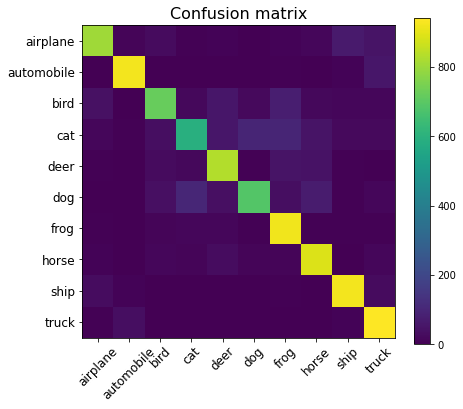

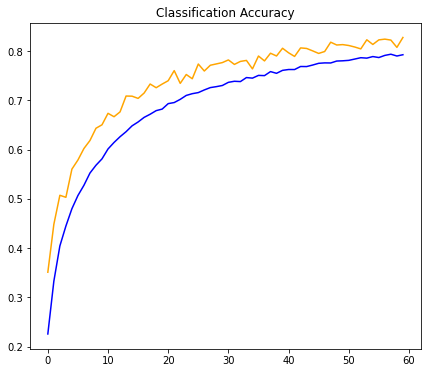



Accuracy on test dataset: 0.8248


In [32]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 64
EPOCHS = 60

def model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3)) #changing the dropout
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #Testing of different optimizers
    opt = keras.optimizers.SGD(lr=INIT_LR, momentum=0.91)
    #opt = keras.optimizers.Adamax(lr=INIT_LR)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

K.clear_session()
model = model()
# model.summary()

#Creation of the modified data set
imgProc = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
modData = imgProc.flow(x_train, y_train, batch_size=BATCH_SIZE)

hist = model.fit(
    modData,  # modified data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights_normal.h5")

# load weights from file (can call without model.fit)
model.load_weights("weights_normal.h5")

# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 6))
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')
plt.show()

print("\n\nAccuracy on test dataset:", accuracy_score(y_test_index, y_pred_test_classes))


In [ ]:
# inspect preditions
# cols = 8
# rows = 2
# fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
# for i in range(cols):
#     for j in range(rows):
#         random_index = np.random.randint(0, len(y_test))
#         ax = fig.add_subplot(rows, cols, i * rows + j + 1)
#         ax.grid('off')
#         ax.axis('off')
#         ax.imshow(x_test[random_index, :])
#         pred_label = cifar10_classes[y_pred_test_classes[random_index]]
#         pred_proba = y_pred_test_max_probas[random_index]
#         true_label = cifar10_classes[y_test_index[random_index]]
#         ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
#                pred_label, pred_proba, true_label
#         ))
# plt.show()

## Discussion of the CNN implementation






### Basis
The base model used in this notebook is based on the VGG model described in this paper: https://arxiv.org/abs/1409.1556. The basis is to have multiple similarly built layers composed by two convolutional layers followed by one (max) pooling layer, as well as a node dropout. In this case each different layer had an increasing kernel number.

This structure allows for the differentiation of features inside of the image, with different convolution filter outputting different features like horizontal/vertical lines for the first convolutions and more specific details with deeper networks. In this case three of these layers gave good results without having too many parameters. The relu activation function was used for it's high efficiency and a good learning rate was found to be the original 0.005. Tests were done in the range 0.001-0.008 and due to the randomness of the networks initialization 0.005 was deemed like the good middle ground (0.001 converged much slower). The initialization of the kernels was also changed from the default Glorot_Uniform to He_Uniform. This was done because some papers showed better results with the latter, but it overall did not change much (https://datascience.stackexchange.com/questions/13061/when-to-use-he-or-glorot-normal-initialization-over-uniform-init-and-what-are). The kernels all had a 3x3 size, like the VGG model. The dropout is also set up at 20%, this was a value that seemed like it only impacted the learning positively and did not remove too many nodes at each call.

The output of these layers was then flattened into a dense (fully connected) double layer, as to be able to process the image features and create the one-hot output for the recognition of the picture. The first dense layer used a relu activation function, just like the rest of the network, but the output layer used a softmax to transform the results into comprehensible probabilities.

Two different optimizers were also tested, namely Adamax and SGD, with the latter having the best results. It would make the accuracy converge faster and higher than Adamax. As said above, the learning rate was kept at 0.005 and a momentum factor was added to help fasten the convergence. The model was not tested with a decay_rate but that could also have made a difference. 

This architecture was very successful as can be seen by the 81.58% accuracy on the testing sample (it did vary between 80.7% and 82.14% depending on the run). There are however a few improvements that can be tried: Data Augmentation and changing the value of the dropout in the model.

### Improvements

As anounced above, two improvements were tried on the model. The first one, data augmentation was done using a prebuilt class "ImageDataGenerator" with which it is very simple to shift and flip the images to create more data from the same original set. To make sure that the x and y training data was kept in order, another prebuilt method was used to create the new augmented dataset. This improvement showed a little success, as it managed to get an accuracy of 82.1% from the test sample. This is not a srastic improvement, but the values seemed on average higher than the simple model, but this would take five times the time to train the base network, with processing time jumping from 4s to 20s.

To improve on this the network then got changed into having different dropout values throughout the model, ranging from 20% to 50% on the last dense layer. This brought a small extra improvement to the networks capability, going up to 82.48% accuracy. This is an improvement, but extremely high as the base effectiveness was already so high. 

# Some tips on how to improve:



* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.

## Potential grading:
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for building a network that gets above 20% accuracy
* +1 for beating each of these milestones on __TEST__ dataset:
    * 50% (5 total)
    * 60% (6 total)
    * 65% (7 total)
    * 70% (8 total)
    * 75% (9 total)
    * 80% (10 total)

## Bonus points
Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example \"A super-small/fast NN that gets 80%\" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)


## Tips on what can be done:

 * __Network size__
   * More neurons, 
   * More layers, ([lasagne docs](http://lasagne.readthedocs.org))
   * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

 * __Convolution layers__
   * they __are a must__ unless you have any super-ideas
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
     `                       num_filters = n_neurons,`
     `                       filter_size = (filter width, filter height),`
     `                       nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.

   * Plenty other layers and architectures
     * http://lasagne.readthedocs.org/en/latest/modules/layers.html
     * batch normalization, pooling, etc


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum


 * __Faster optimization__ - 
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (lasagne.layers.batch_norm) FTW!


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   * Dropout - to prevent overfitting
     * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`   
     * Don't overdo it. Check if it actually makes your network better


 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Add Noize (easiest: GaussianNoizeLayer)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.
